In [1]:
import sys
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
global azcon, azcursor
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from spellchecker import SpellChecker
from datetime import date

plt.style.use('ggplot')
%matplotlib inline

In [63]:
# Function used to load in survey data from ------'s DB
# type = '---'/'---'
def load_surveydata(type=''):
    # SQL Database Connection
    driver = "---------"
    host = "---------"
    user = "---------"
    passwd = "---------"
    port = 9999 
    db = "---------"
    connstr = f"DRIVER={driver};SERVER=tcp:{host};DATABASE={db};UID={user};PWD={passwd}"
    conn = pyodbc.connect(connstr)
    cursor = conn.cursor()
    
    if type == '---------':
        try:
            # Querying for column names
            # Appending the column names to a list named column_names
            query = """SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'tb_eoc'"""
            cursor.execute(query)
            data = cursor.fetchall()
            column_names = []
            for row in data:
                column_names.append(row[3])

            # Creating dataframe to house the survey data
            df = pd.DataFrame(columns=column_names)
    
            # Getting the survey data out of the database
            query = """SELECT * from ---------"""
            cursor.execute(query)
            data = cursor.fetchall()

            # Iterating through the rows of fetched data from database, writing it into a dataframe
            for i in range(len(data)):
                df.loc[i] = data[i]

            df = df.drop('---------', axis=1)
    
            return df    
    
        except:
            message = 'Failed to load {type} data.'.format(type = type)
            
            return message

    elif type == '---------':
        try:
            query = """SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '---------'"""
            cursor.execute(query)
            data = cursor.fetchall()

            column_names = []
            for row in data:
                column_names.append(row[3])
            
            df = pd.DataFrame(columns=column_names)
    
            # Getting the survey data out of the database
            query = """SELECT * from ---------"""
            cursor.execute(query)
            data = cursor.fetchall()

            # Iterating through the rows of fetched data from database, writing it into a dataframe
            for i in range(len(data)):
                df.loc[i] = data[i]

            df = df.drop('id', axis=1)
            
            return df            

        except:
            message = 'Failed to load {type} data.'.format(type = type)
            
            return message
        
    else:
        message = 'Error. Please indicate a value for type field'
        
        return message

# ---------------------------------------------------------------------------------------------------------------- #
# Function used to carry out very basic EDA and to split data into numerical/text groups
def process_surveydata(df, type='', output=''): 
    if type == '---------' and output == '---------':
        numerical_columns = []
        for column in df.columns:
            if '---------' in column:
                numerical_columns.append(column)
        
        for numerical_column in numerical_columns:
            df[numerical_column] = df[numerical_column].fillna(0)
            df[numerical_column] = df[numerical_column].apply(lambda x :int(x))
        
        identifiers = ['---------', '---------', '---------', '---------', '---------', '---------', '---------', '---------']
        
        combined = numerical_columns + identifiers
        
        df = df[combined]
        
        return df
    
    elif type == '---------' and output == '---------':
        text_columns = ['---------', '---------', '---------', '---------', '---------', '---------']
        identifiers = ['---------', '---------', '---------', '---------', '---------', '---------', '---------', '---------']
        
        combined = text_columns + identifiers
        
        df = df[combined]
        
        return df
    
    elif type == '---------' and output == '---------l':
        numerical_columns = []
        for column in df.columns:
            if '---------' in column:
                numerical_columns.append(column)
        
        for numerical_column in numerical_columns:
            df[numerical_column] = df[numerical_column].fillna(0)
            df[numerical_column] = df[numerical_column].apply(lambda x :int(x))
        
        # numerical_columns = ['---------', '---------', '---------', '---------', '---------', '---------'] 
        identifiers = ['---------', '---------', '---------', '---------', '---------', '---------', '---------', '---------', '---------']
        
        combined = numerical_columns + identifiers
        
        df = df[combined]
        
        return df
        
    elif type == '---------' and output == '---------':
        text_columns = ['---------', '---------', '---------', '---------', '---------']
        identifiers = ['---------', '---------', '---------', '---------', '---------', '---------', '---------', '---------', '---------']
        
        combined = text_columns + identifiers
        
        df = df[combined]
    
    else:
        return df

# ---------------------------------------------------------------------------------------------------------------- #
# Function used to filter survey data by different columns
def filter_surveydata(df, key, by=''):
    if by == '---------':
        df = df[df['---------'] == key]
        return df
    
    elif by == '---------':
        df = df[df['---------'] == key]
        return df
    
    elif by == '---------':
        df = df[df['---------'] == key]
        return df
    
    elif by == '---------':
        df = df[df['---------'] == key]
        return df
    
    elif by == '---------':
        df = df[df['---------'] == key]
        return df
    
    else:
        message = 'Error, failed to input required parameters.'
        return message

# ---------------------------------------------------------------------------------------------------------------- #
# Function used to search for unique filter keys
def search_filter_keys(type, search_term, list_all=False, by=''):
    driver = '---------'
    host = '---------'
    user = '---------'
    passwd = '---------'
    port = 9999 
    db = '---------'
    connstr = f"DRIVER={driver};SERVER=tcp:{host};DATABASE={db};UID={user};PWD={passwd}"
    conn = pyodbc.connect(connstr)
    cursor = conn.cursor()
    
    # Fetching column names
    query = """SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '---------_x_'"""
    query.replace('_x_', type)
    cursor.execute(query)
    data = cursor.fetchall()
    
    # Creating dataframe with fetched column names
    column_names = []
    for row in data:
        column_names.append(row[3])
    df = pd.DataFrame(columns=column_names)
 
    if list_all == False:
        if by == '---------':
            query = """SELECT DISTINCT --------- FROM ---------_x_ WHERE --------- LIKE '%_y_%'"""
            query = query.replace('_x_', type)
            query = query.replace('_y_', search_term)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output           
            
        elif by == '---------':
            query = """SELECT DISTINCT --------- FROM ---------__x_ WHERE --------- LIKE '%_y_%'"""
            query = query.replace('_x_', type)
            query = query.replace('_y_', search_term)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
        
        elif by == '---------':
            query = """SELECT DISTINCT --------- FROM ---------__x_ WHERE --------- LIKE '%_y_%'"""
            query = query.replace('_x_', type)
            query = query.replace('_y_', search_term)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
            
        elif by == ---------:
            query = """SELECT DISTINCT --------- FROM ---------_x_ WHERE --------- LIKE '%_y_%'"""
            query = query.replace('_x_', type)
            query = query.replace('_y_', search_term)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
            
        elif by == ---------:
            query = """SELECT DISTINCT --------- FROM ---------_x_ WHERE --------- LIKE '%_y_%'"""
            query = query.replace('_x_', type)
            query = query.replace('_y_', search_term)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
        
        else:
            message = 'Error!'
            return message
    
    elif list_all == True:
        if by == '---------':
            query = """SELECT DISTINCT --------- FROM ---------_x_"""
            query = query.replace('_x_', type)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
        
        elif by == '---------:
            query = """SELECT DISTINCT --------- FROM ---------_x_"""
            query = query.replace('_x_', type)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
            
        elif by == '---------':
            query = """SELECT DISTINCT --------- FROM ---------_x_"""
            query = query.replace('_x_', type)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
            
        elif by == '---------':
            query = """SELECT DISTINCT --------- FROM ---------_x_"""
            query = query.replace('_x_', type)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
            
        elif by == '---------':
            query = """SELECT DISTINCT --------- FROM ---------_x_"""
            query = query.replace('_x_', type)
            cursor.execute(query)
            data = cursor.fetchall()
            output = []
            for dat in data:
                output.append(str(dat).replace('(', '').replace(', )', '').replace("'", ''))
            
            return output  
        
        else:
            message = 'Error!'
            return message
    
    else:
        message = 'Error!'
        return message
        

In [ ]:
survey_df =  load_surveydata(type='eoc')
survey_df.to_csv(path_or_buf='survey_eoc.csv')

<BarContainer object of 2 artists>

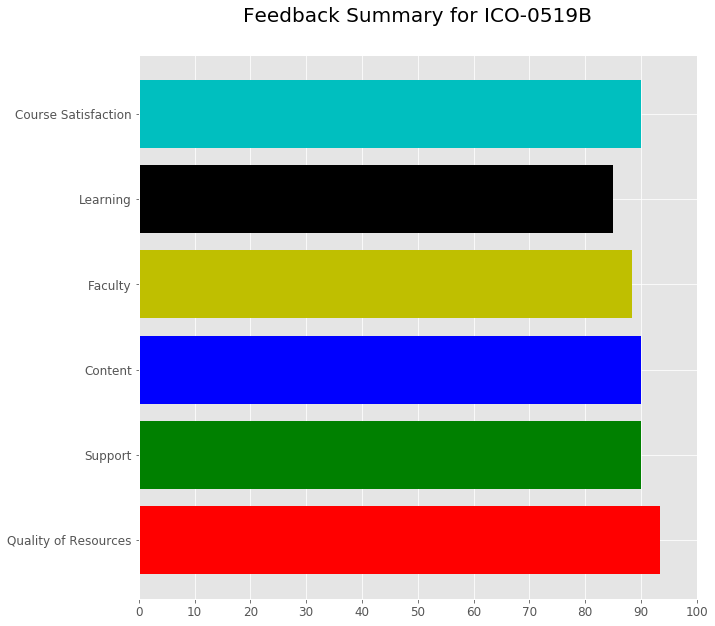

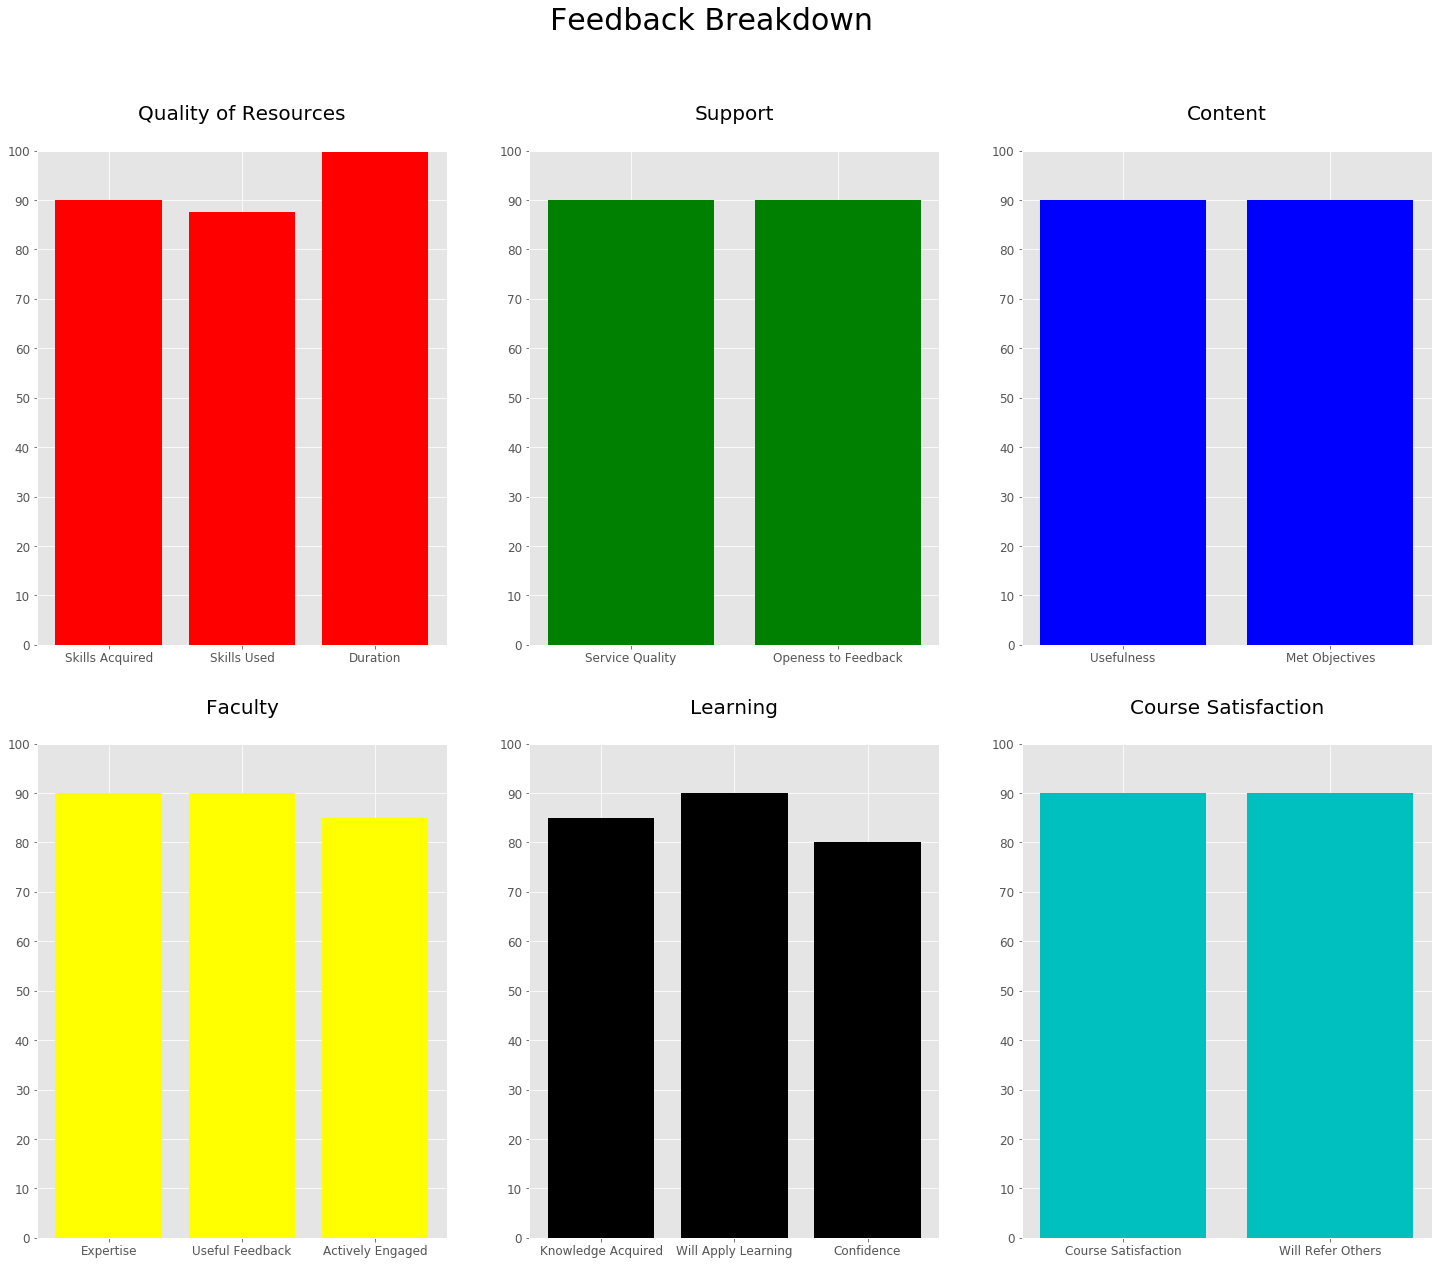

In [6]:
overall = survey_df[survey_df['---------'] == '---------'][['---------', '---------', '---------', '---------', '---------', '---------']]
support = survey_df[survey_df['---------'] == '---------'][['---------', '---------']]
content = survey_df[survey_df['---------'] == '---------'][['---------', '---------']]
faculty = survey_df[survey_df['---------'] == '---------'][['---------', '---------', '---------']]
learning = survey_df[survey_df['---------'] == '---------'][['---------', '---------', '---------']]
course_satisfaction = survey_df[survey_df['---------'] == '---------'][['---------', '---------']]
resource = survey_df[survey_df['---------'] == '---------'][['---------', '---------','---------']] 

# Overall Summary
overall_labels = ['Quality of Resources', 'Support', 'Content', 'Faculty', 'Learning', 'Course Satisfaction']
overall_labels_pos = [i for i, _ in enumerate(overall_labels)]
overall_values = list(overall.mean())
plt.figure(figsize=(10,10))
plt.xlim((0,100))
plt.xticks(np.arange(0,110,10))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Feedback Summary for ---------', size=20, fontdict={'position' : (0.5,1.05)})
plt.barh(overall_labels_pos, overall_values, color=['r','g','b','y','k','c'])
plt.yticks(overall_labels_pos, overall_labels)

# Subplots ---------------------------------------------------------------------------------------------
fig, axs = plt.subplots(2,3, figsize=(25,20))
fig.suptitle('Feedback Breakdown', size=30)


# Resources
resource_labels = ['Skills Acquired', 'Skills Used', 'Duration']
resource_labels_pos = [i for i, _ in enumerate(resource_labels)]
resource_values = list(resource.mean())
axs[0][0].set_xticks(resource_labels_pos)
axs[0][0].set_xticklabels(resource_labels)
axs[0][0].set_ylim((0,100))
axs[0][0].set_yticks(np.arange(0,110,10))
axs[0][0].tick_params(axis='both', which='major', labelsize=12)
axs[0][0].set_title('Quality of Resources', size=20, fontdict={'position' : (0.5,1.05)})
axs[0][0].bar(resource_labels, resource_values, color='red')


# Support
support_labels = ['Service Quality', 'Openess to Feedback']
support_labels_pos = [i for i, _ in enumerate(support_labels)]
support_values = list(support.mean())
axs[0][1].set_xticks(support_labels_pos)
axs[0][1].set_xticklabels(support_labels)
axs[0][1].set_ylim((0,100))
axs[0][1].set_yticks(np.arange(0,110,10))
axs[0][1].tick_params(axis='both', which='major', labelsize=12)
axs[0][1].set_title('Support', size=20, fontdict={'position' : (0.5,1.05)})
axs[0][1].bar(support_labels, support_values, color='green')

# Content
content_labels = ['Usefulness', 'Met Objectives']
content_labels_pos = [i for i, _ in enumerate(content_labels)]
content_values = list(content.mean())
axs[0][2].set_xticks(content_labels_pos)
axs[0][2].set_xticklabels(content_labels)
axs[0][2].set_ylim((0,100))
axs[0][2].set_yticks(np.arange(0,110,10))
axs[0][2].tick_params(axis='both', which='major', labelsize=12)
axs[0][2].set_title('Content', size=20, fontdict={'position' : (0.5,1.05)})
axs[0][2].bar(content_labels, content_values, color='blue')

# Faculty
faculty_labels = ['Expertise', 'Useful Feedback', 'Actively Engaged']
faculty_labels_pos = [i for i, _ in enumerate(faculty_labels)]
faculty_values = list(faculty.mean())
axs[1][0].set_xticks(faculty_labels_pos)
axs[1][0].set_xticklabels(faculty_labels)
axs[1][0].set_ylim((0,100))
axs[1][0].set_yticks(np.arange(0,110,10))
axs[1][0].tick_params(axis='both', which='major', labelsize=12)
axs[1][0].set_title('Faculty', size=20, fontdict={'position' : (0.5,1.05)})
axs[1][0].bar(faculty_labels, faculty_values, color='yellow')

# Learning
learning_labels = ['Knowledge Acquired', 'Will Apply Learning', 'Confidence']
learning_labels_pos = [i for i, _ in enumerate(learning_labels)]
learning_values = list(learning.mean())
axs[1][1].set_xticks(learning_labels_pos)
axs[1][1].set_xticklabels(learning_labels)
axs[1][1].set_ylim((0,100))
axs[1][1].set_yticks(np.arange(0,110,10))
axs[1][1].tick_params(axis='both', which='major', labelsize=12)
axs[1][1].set_title('Learning', size=20, fontdict={'position' : (0.5,1.05)})
axs[1][1].bar(learning_labels, learning_values, color='black')

# Course Satisfaction
course_satisfaction_labels = ['Course Satisfaction', 'Will Refer Others']
course_satisfaction_labels_pos = [i for i, _ in enumerate(course_satisfaction_labels)]
course_satisfaction_values = list(course_satisfaction.mean())
axs[1][2].set_xticks(course_satisfaction_labels_pos)
axs[1][2].set_xticklabels(course_satisfaction_labels)
axs[1][2].set_ylim((0,100))
axs[1][2].set_yticks(np.arange(0,110,10))
axs[1][2].tick_params(axis='both', which='major', labelsize=12)
axs[1][2].set_title('Course Satisfaction', size=20, fontdict={'position' : (0.5,1.05)})
axs[1][2].bar(course_satisfaction_labels, course_satisfaction_values, color='c')

In [8]:
# Inputs: df = dataframe, category = column_name
def wordcloud_generator(df, category):
    # Iterate through feedback data found in dataframe
    # Add each row of feedback into the string
    text = ''
    for feedback in df[category]:
        if feedback != None:
            text += feedback
            text += ' '
    
    # Initialize spell-checker
    # Split feedback text into individual words 
    # Run each word through spell-checker
    # Misspelled words are saved under misspelled
    spell = SpellChecker()    
    spellcheck_list = text.split()
    misspelled = spell.unknown(spellcheck_list)
    
    # Remove misspelled words from list of words for feedback text
    for word in spellcheck_list:
        if word in list(misspelled):
            spellcheck_list.remove(word)
    
    # Add corrected words back into list of words
    for word in misspelled:
        spellcheck_list.append(spell.correction(word))
    
    # Initalize stopwords to be used
    # Include some additional words inside the stopwords dictionary
    stopwords = set(STOPWORDS)
    update_stopwords = ["---------", 'course', 'shopping', 'quite', '---------', 'NIL', 'NAN', 'time',
                        'support', 'student', 'feedback', 'module', 'sometimes', 'NA', 'might', 'need',
                        'will', 'students', 'mentor', 'still', 'back', 'takes', 'together']
    stopwords.update(update_stopwords)
    
    # Convert list of words into a string format for WordCloud
    processed_text = ''
    for word in spellcheck_list:
        processed_text += word
        processed_text += ' '
    
    # Create WordCloud
    # Save Wordcloud under filename 'category_wordcloud_date.png'
    # return .png file as function output to send over Telegram
    # If there is an error, return error message
    try:
        wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=50, min_word_length=4).generate(processed_text)
    
        output = plt.figure(figsize= (20,15))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
        date_today = str(date.today())
        picture = output.savefig('{category}_wordcloud_{date}.png'.format(category = category, date = date_today))
        return picture
    
    except:
        message = 'There is insufficient data to generate Word Cloud.'
        return message

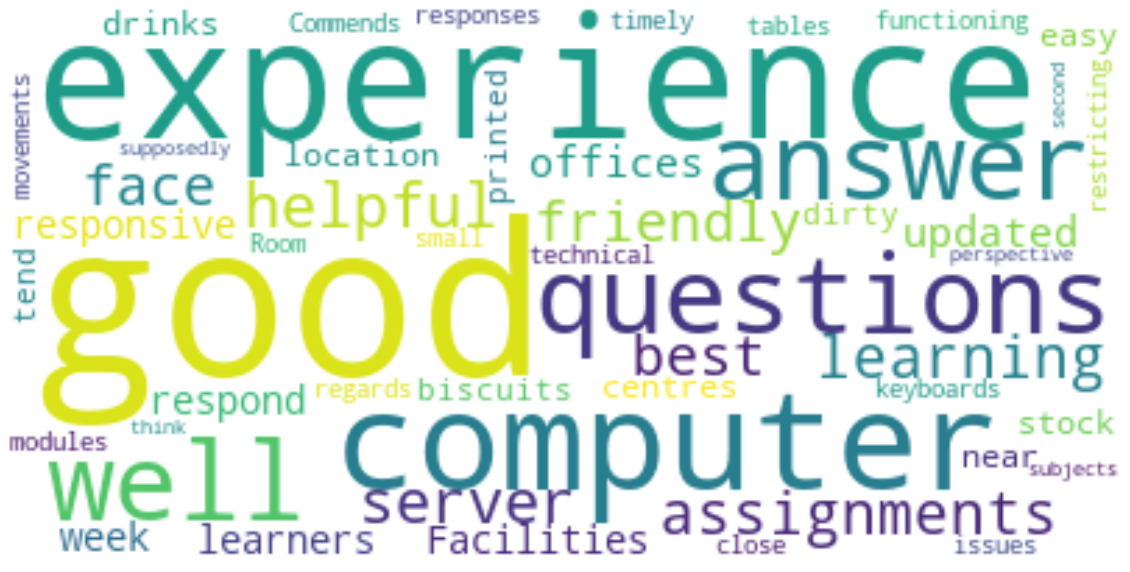

In [10]:
text_columns = ['---------', '---------', '---------', '---------', '---------', '---------']
data = survey_df[survey_df['module_name'] == '---------'][text_columns]

wordcloud_generator(data, '---------')